In [1]:
# Load data and color options

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

sns.set(style='white', context='notebook', rc={'figure.figsize':(10,14)})

# load data
full_data = pd.read_csv("GSE104276.csv", index_col=0)
full_data = full_data.transpose()
sample_info = full_data.index

In [2]:
# Group by week number and assign colors

week_info, drop_index = [], []

for row_index in range(len(sample_info)):
    row_info = sample_info[row_index]
    try:
        single_week = int(row_info[2: 4])
        week_info.append(single_week)
    except:
        print(row_info, 'dropped')
        drop_index.append(row_info)
full_data = full_data.drop(drop_index)

# get color options and assign to groups
colors = []
color_options = {
    'GW08':(0, 45, 106),
    'GW09': (227, 27, 35),
    'GW10': (0, 92, 171),
    'GW12': (220, 238, 243),
    'GW13': (255, 195, 37),
    'GW16': (0, 255, 127),
    'GW19': (255, 170, 207),
    'GW23': (246, 230, 194),
    'GW26': (220, 132, 73)
}

for key in list(color_options.keys()):
    # key = list(color_options.keys())[0]
    color_options[key] = [_/255 for _ in color_options[key]]
# 8, 9, 10, 12, 13, 16, 19, 23, 26
for week in week_info:
    if week == 8:
        temp_color = color_options['GW08']
    elif week == 9:
        temp_color = color_options['GW09']
    else:
        temp_color = color_options['GW' + str(week)]
    colors.append(temp_color)

legends = [mpatches.Patch(color=color_options[_], label=_) for _ in color_options.keys()]

Unnamed: 2394 dropped


In [3]:
# PCA to do dimensional reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
pca_result = pca.fit_transform(full_data)

# print PCA result
print(pca.explained_variance_ratio_)

[0.35563252 0.27668538 0.02485799 0.01826799 0.01530097 0.01227121
 0.01086073 0.00924596 0.00717753 0.0060837  0.00590081 0.00562276
 0.00531513 0.00503255 0.0046598  0.00423815 0.00374377 0.00372944
 0.00347668 0.00324273 0.00309645 0.00295716 0.00293049 0.00266062
 0.00257434]


In [4]:
scaled_full_data_data = StandardScaler().fit_transform(pca_result)

In [5]:
# ******************** UMAP ******************** #

import umap.umap_ as umap
reducer = umap.UMAP()

fit = umap.UMAP(n_neighbors=6, min_dist=0.1, n_components=2, metric='euclidean')
umap_result = fit.fit_transform(scaled_full_data_data)

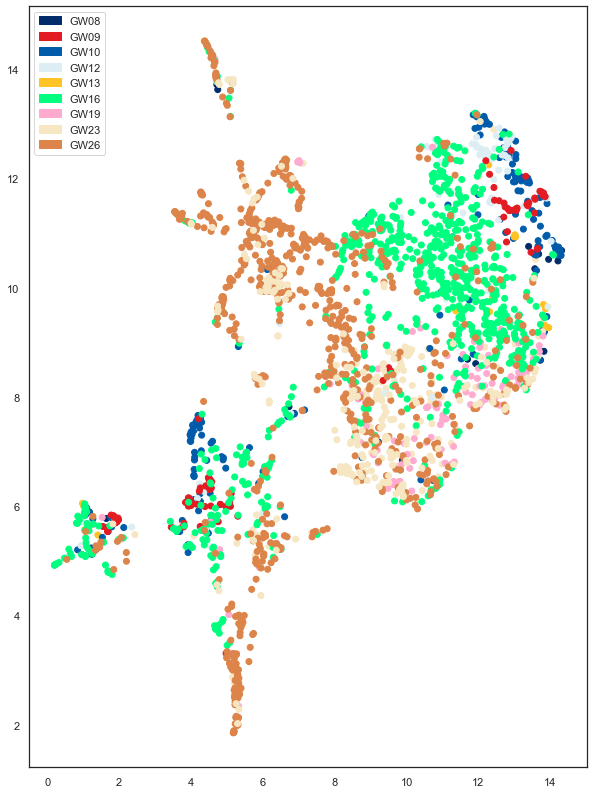

In [6]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.scatter(umap_result[:,0], umap_result[:,1], c = colors)
ax.legend(handles=legends)
plt.show()

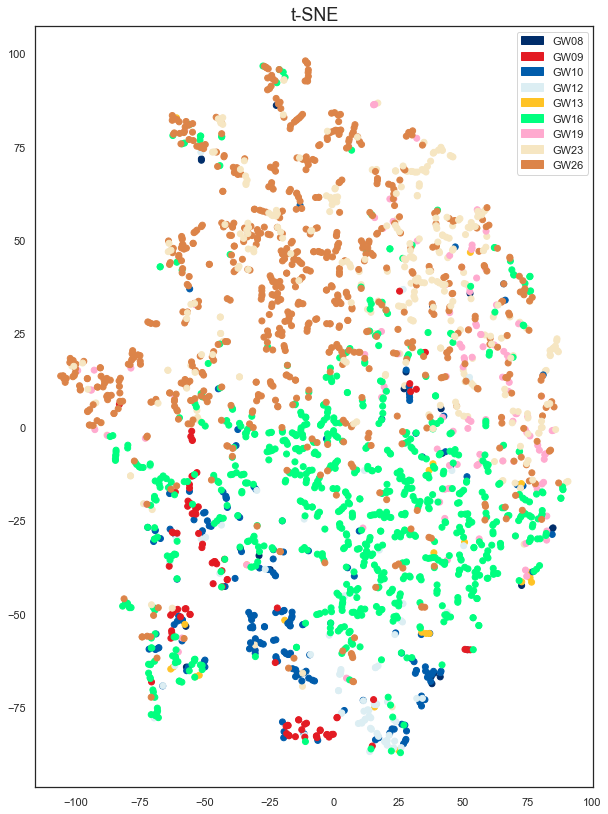

In [10]:
# ******************** tSNE ******************** #

from sklearn.manifold import TSNE
embedded = TSNE(n_components=2, perplexity=5 ).fit_transform(scaled_full_data_data)

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

fig = plt.figure("t-SNE")

ax = fig.add_subplot(111)
ax.scatter(embedded[:,0], embedded[:,1], c = colors)
ax.legend(handles=legends)

plt.title("t-SNE", fontsize=18)

plt.show()